<a href="https://colab.research.google.com/github/jaekang0/ADS-Catheter-Placement-Group/blob/jae-branch/Catheter_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CATHETER PLACEMENT

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd Catheter Placement

[Errno 2] No such file or directory: 'Catheter Placement'
/content


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

train_data = pd.read_csv('/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train.csv')
train_data

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


In [5]:
train_anno = pd.read_csv('/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train_annotations.csv')
train_anno.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [6]:
train_data.shape

(30083, 13)

In [7]:
train_anno.shape

(17999, 3)

There are less annotations than actual data



In [8]:
number_of_patients = train_data['PatientID'].value_counts()
number_of_studies = train_data['StudyInstanceUID'].value_counts()
number_of_studies_anno = train_anno['StudyInstanceUID'].value_counts()

print(f"Number of patients in train_data: {len(number_of_patients)}")
print(f"Number of studies in train_data: {len(number_of_studies)}")
print(f"Number of studies in train_anno: {len(number_of_studies_anno)}")

Number of patients in train_data: 3255
Number of studies in train_data: 30083
Number of studies in train_anno: 9095


Not all studies are annotated

In [26]:
#All study instances are not annotated, will create separate df of only annotated images.
study_annotated = pd.merge(train_data, train_anno, on='StudyInstanceUID', how='inner')

In [27]:
study_annotated.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,types_of_catheters,label,data
0,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,0,CVC - Borderline,"[[950, 1272], [980, 1174], [1011, 1070], [1058..."
1,1.2.826.0.1.3680043.8.498.23133310896792275593...,0,0,0,0,0,0,0,0,1,1,0,f6147af3f,0,CVC - Normal,"[[914, 758], [957, 615], [1047, 543], [1145, 4..."
2,1.2.826.0.1.3680043.8.498.23133310896792275593...,0,0,0,0,0,0,0,0,1,1,0,f6147af3f,0,CVC - Borderline,"[[930, 991], [918, 860], [909, 779], [900, 658..."
3,1.2.826.0.1.3680043.8.498.21553435248897151659...,0,0,1,1,0,0,1,0,0,1,0,00f261590,0,ETT - Normal,"[[1026, 661], [1082, 519], [1128, 396], [1162,..."
4,1.2.826.0.1.3680043.8.498.21553435248897151659...,0,0,1,1,0,0,1,0,0,1,0,00f261590,0,NGT - Normal,"[[1738, 1470], [1564, 1659], [1492, 1733], [14..."


In [28]:
study_annotated.shape

(17999, 16)

# Data Cleaning

Checking for null values:

In [9]:
train_data.isna().sum()

,0
StudyInstanceUID,0
ETT - Abnormal,0
ETT - Borderline,0
ETT - Normal,0
NGT - Abnormal,0
NGT - Borderline,0
NGT - Incompletely Imaged,0
NGT - Normal,0
CVC - Abnormal,0
CVC - Borderline,0


Checking for duplicates

In [10]:
duplicates = train_data.duplicated()
num_duplicates = duplicates.sum()
print(f"Duplicates present: {num_duplicates}")

Duplicates present: 0


# Exploratory Data Analysis

In [11]:
train_data.shape

(30083, 13)

In [12]:
train_data['types_of_catheters'] = train_data[['ETT - Abnormal', 'ETT - Borderline']].sum(axis=1)
train_data

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,types_of_catheters
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,0
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c,0
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,0
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814,0
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30,0
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8,0
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d,0
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8,0


Meaning of each variables:

StudyInstanceUID : unique ID for each image

ETT - Abnormal : endotracheal tube placement abnormal

ETT - Borderline : endotracheal tube placement borderline abnormal

ETT - Normal : endotracheal tube placement normal

NGT - Abnormal : nasogastric tube placement abnormal

NGT - Borderline : nasogastric tube placement borderline abnormal

NGT - Incompletely Imaged : nasogastric tube placement inconclusive due to imaging

NGT - Normal : nasogastric tube placement borderline normal

CVC - Abnormal : central venous catheter placement abnormal

CVC - Borderline : central venous catheter placement borderline abnormal

CVC - Normal : central venous catheter placement normal

Swan Ganz Catheter Present

PatientID : unique ID for each patient in the dataset

### Distribution of Catheter Types

In [13]:
sums_of_catheters = train_data[['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']].sum()
sums_of_catheters

,0
ETT - Abnormal,79
ETT - Borderline,1138
ETT - Normal,7240
NGT - Abnormal,279
NGT - Borderline,529
NGT - Incompletely Imaged,2748
NGT - Normal,4797
CVC - Abnormal,3195
CVC - Borderline,8460
CVC - Normal,21324


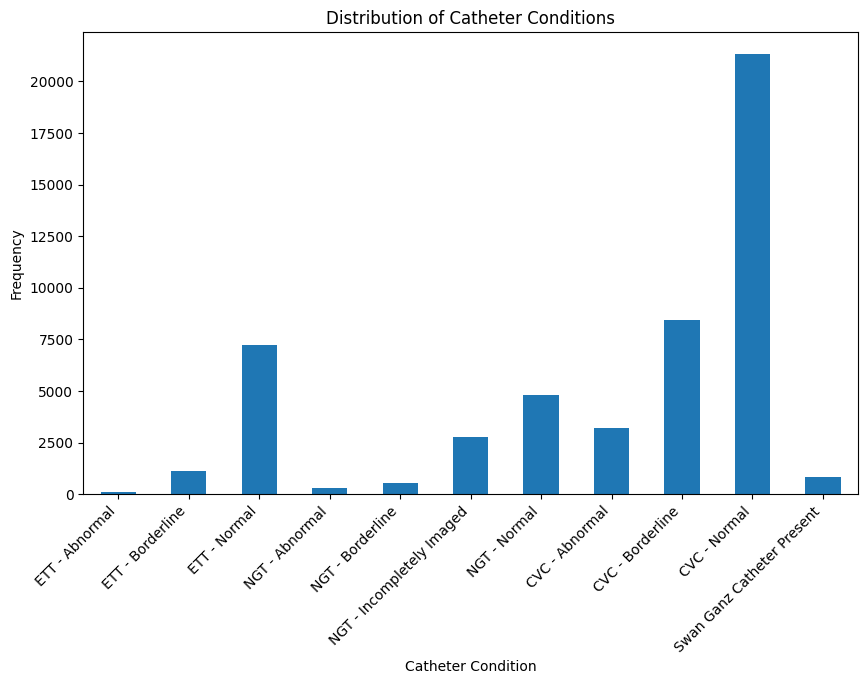

In [14]:
catheter_columns = ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
                   'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
                   'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline',
                   'CVC - Normal', 'Swan Ganz Catheter Present']

sums_of_catheters = train_data[catheter_columns].sum()
sums_of_catheters.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Catheter Conditions')
plt.xlabel('Catheter Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
print("Number of unique patients: ", train_data["PatientID"].unique().shape[0])

Number of unique patients:  3255


## Correlation Analysis

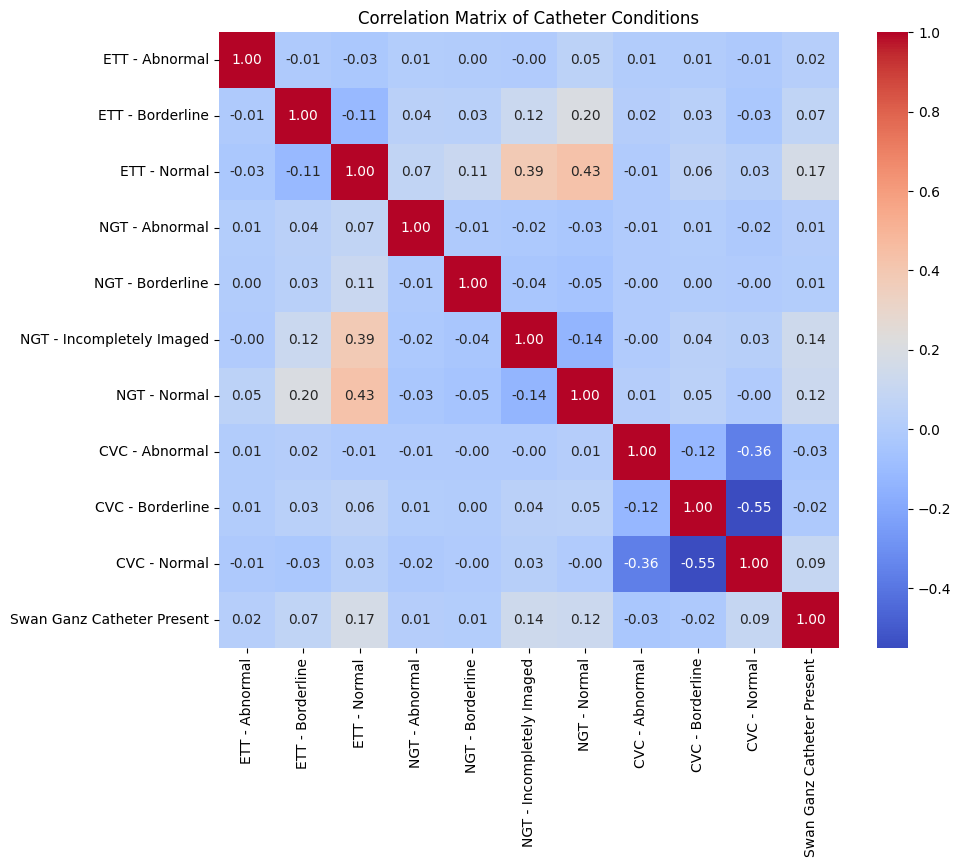

In [16]:
corr_matrix = train_data[catheter_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Catheter Conditions')
plt.show()


## PatientID Analysis

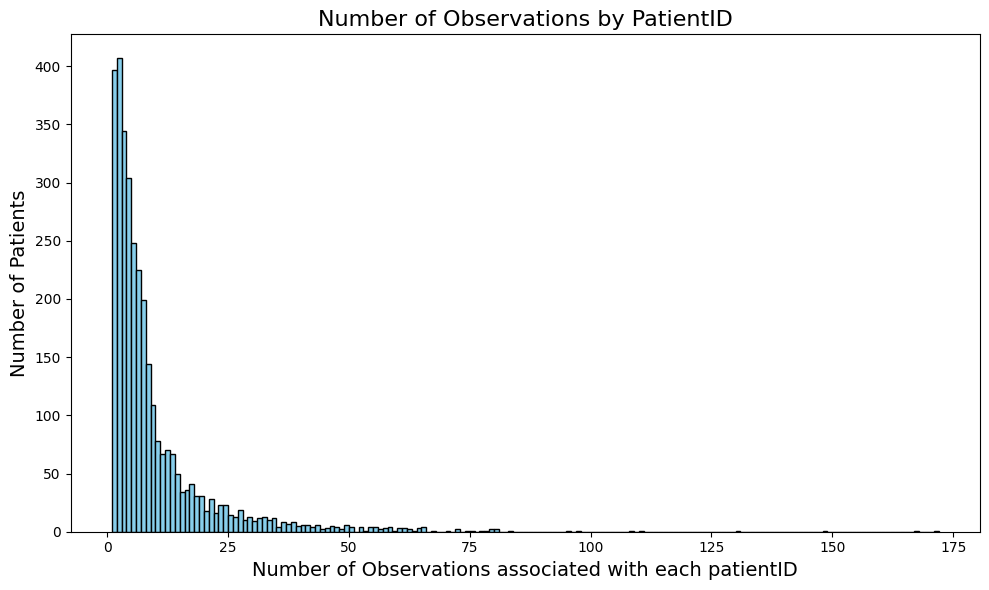

In [17]:
# Count the number of observations per PatientID
observations_per_patient = train_data['PatientID'].value_counts()

# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(observations_per_patient, bins=range(1, observations_per_patient.max() + 1), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Number of Observations by PatientID', fontsize=16)
plt.xlabel('Number of Observations associated with each patientID', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Image Analysis

In [19]:
pip install opencv-python


For this segment, I will graph the location of the catheters from 5 random patients

In [50]:
import cv2
import matplotlib.pyplot as plt

# Directory where your X-ray images are stored
image_dir = "/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train/"

# Define a color map for different catheter types
color_map = {
    'ETT - Abnormal': 'red',
    'ETT - Borderline': 'orange',
    'ETT - Normal': 'green',
    'NGT - Abnormal': 'blue',
    'NGT - Borderline': 'purple',
    'NGT - Incompletely Imaged': 'brown',
    'NGT - Normal': 'pink',
    'CVC - Abnormal': 'yellow',
    'CVC - Borderline': 'cyan',
    'CVC - Normal': 'magenta',
    'Swan Ganz Catheter Present': 'black'
}

# Improved function to plot catheters on the image
def plot_catheter_on_image(study_instance_uid, annotations_df):
    # Load the image corresponding to the StudyInstanceUID using OpenCV
    image_path = f"{image_dir}{study_instance_uid}.jpg"
    xray_image = cv2.imread(image_path)

    if xray_image is None:
        print(f"Image {study_instance_uid} not found.")
        return

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

    # Filter the annotations for this particular image
    annotations = annotations_df[annotations_df['StudyInstanceUID'] == study_instance_uid]

    # Display the image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(xray_image_rgb)

    # Plot each coordinate point with its label
    for _, row in annotations.iterrows():
        coords = eval(row['data'])  # Convert string to list of coordinates
        label = row['label']

        # Get the color for this catheter type
        color = color_map.get(label, 'red')  # Default to red if label not in map

        # Plot each point in the coordinate list
        for coord in coords:
            ax.scatter(coord[0], coord[1], color=color, s=50, label=label)

    # Ensure only one legend entry per catheter type
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    ax.set_title(f"Catheter Placements for StudyInstanceUID: {study_instance_uid}")
    plt.axis('off')
    plt.show()

In [42]:
study_annotated['StudyInstanceUID'] == '1.2.826.0.1.3680043.8.498.12901508112365964189424406388273352286'

,StudyInstanceUID
0,False
1,False
2,False
3,False
4,False
...,...
17994,False
17995,False
17996,False
17997,False


There are less actual images than annotated images, so will filter and use a new df

In [45]:
import os
import pandas as pd

# Directory where your X-ray images are stored
image_dir = "/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train/"

# List all files in the image directory
available_images = set(os.listdir(image_dir))

# Assuming the images are named like StudyInstanceUID.jpg
# You may need to adjust this if they have a different extension
available_uids = {os.path.splitext(image)[0] for image in available_images}

# Filter study_annotated to include only rows where StudyInstanceUID exists in available_uids
study_annotated_filtered = study_annotated[study_annotated['StudyInstanceUID'].isin(available_uids)]

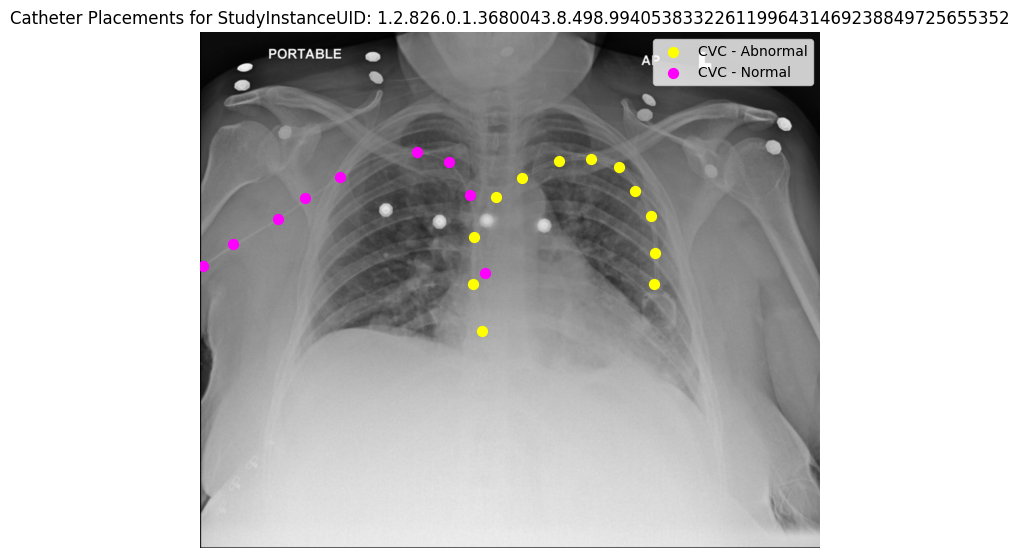

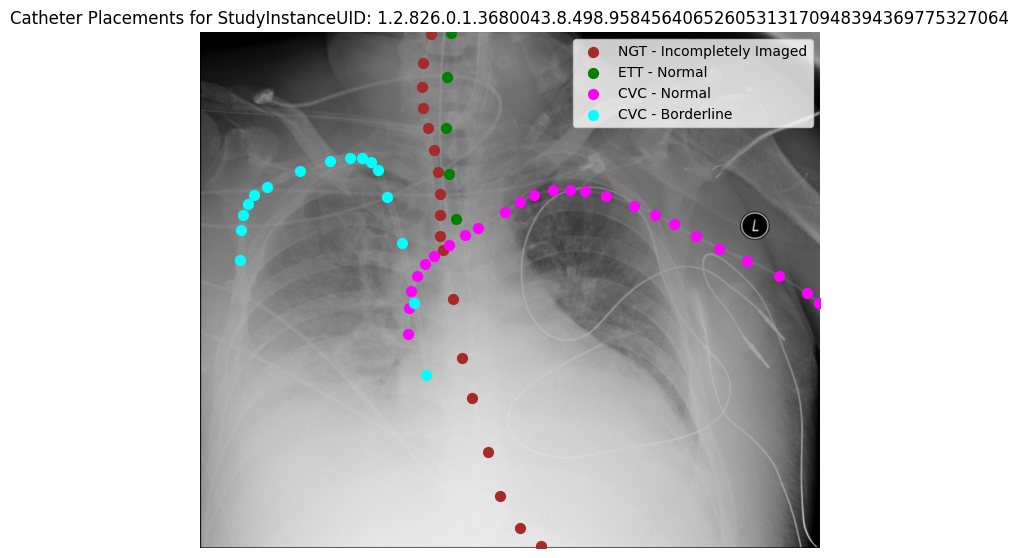

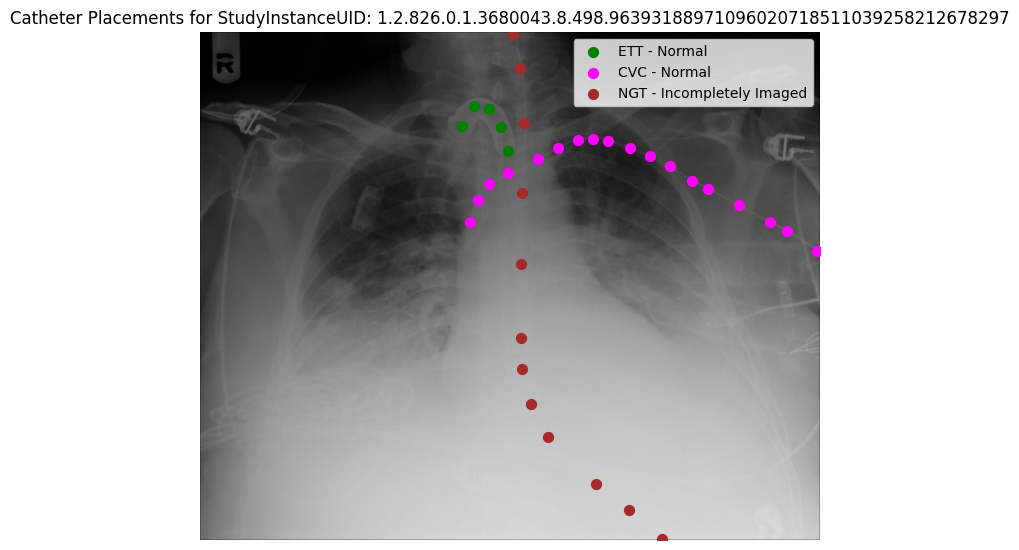

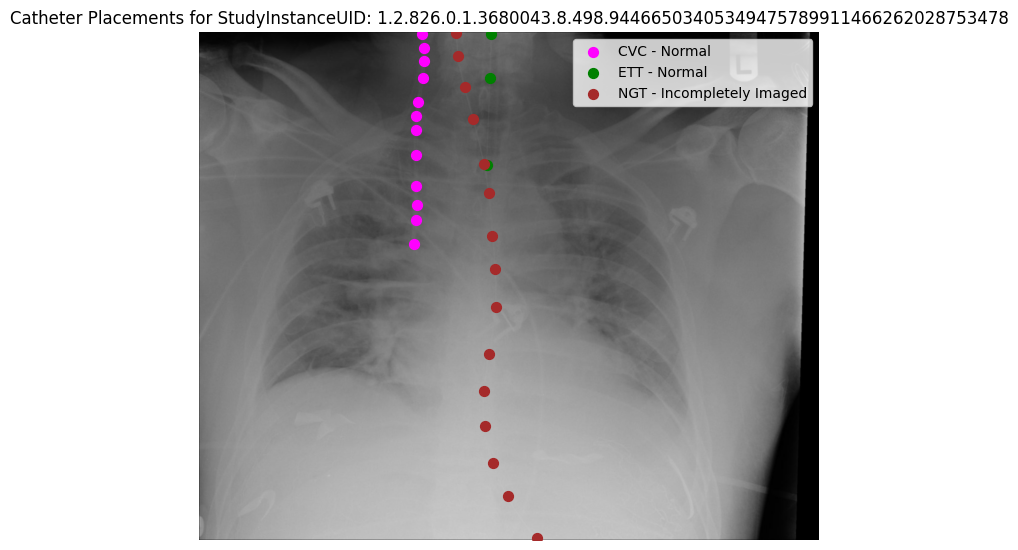

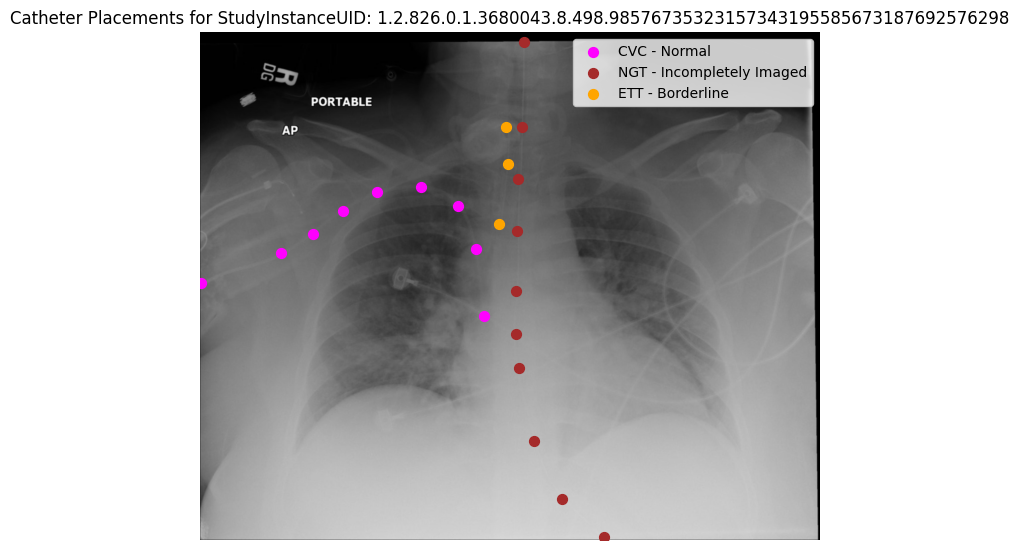

In [46]:
# Select 5 random StudyInstanceUIDs from the filtered DataFrame
random_studies = study_annotated_filtered['StudyInstanceUID'].sample(n=5, random_state=42)

# Plot the randomly selected 3 studies
for study_uid in random_studies:
    plot_catheter_on_image(study_uid, study_annotated_filtered)

## Extracting Conventional features

Grey Scale Features
  - Mean Intensity: Calculate the mean pixel intensity of the image or specific regions.
  - Histogram of Intensity: Analyze the distribution of pixel intensities.

In [58]:
import cv2
import numpy as np
from skimage import io
import cv2
import numpy as np

def extract_grayscale_features(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    mean_intensity = np.mean(image)
    std_intensity = np.std(image)
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

    return mean_intensity, std_intensity, histogram


StudyInstanceUID: 1.2.826.0.1.3680043.8.498.99405383322611996431469238849725655352
Mean Intensity: 139.4484481502519
Standard Deviation of Intensity: 57.57237767566092


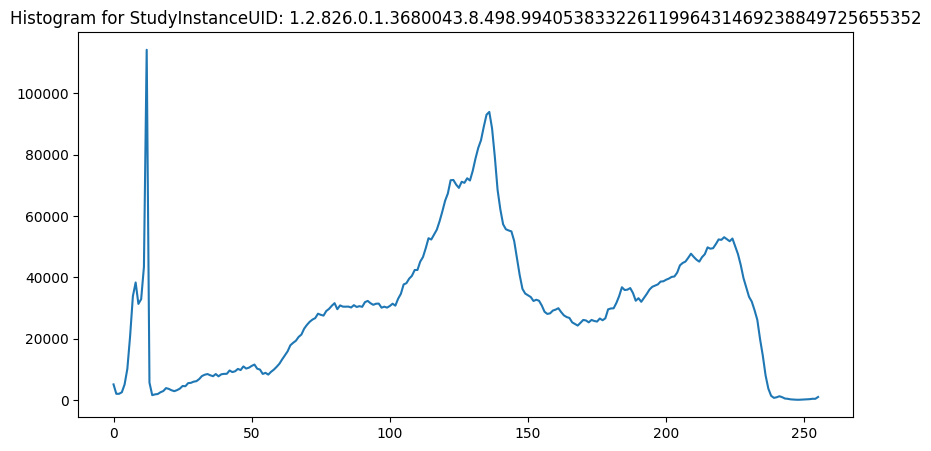

StudyInstanceUID: 1.2.826.0.1.3680043.8.498.95845640652605313170948394369775327064
Mean Intensity: 136.60751416432052
Standard Deviation of Intensity: 55.74992192286935


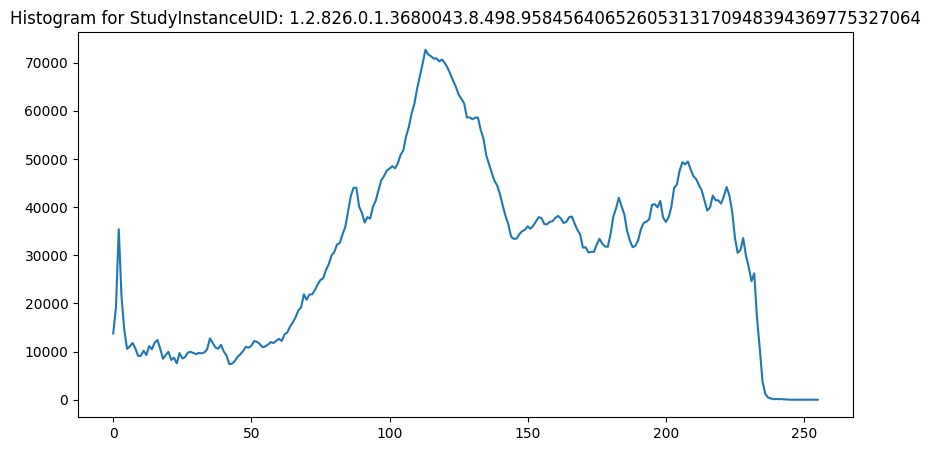

StudyInstanceUID: 1.2.826.0.1.3680043.8.498.96393188971096020718511039258212678297
Mean Intensity: 113.5807861328125
Standard Deviation of Intensity: 63.64795908028096


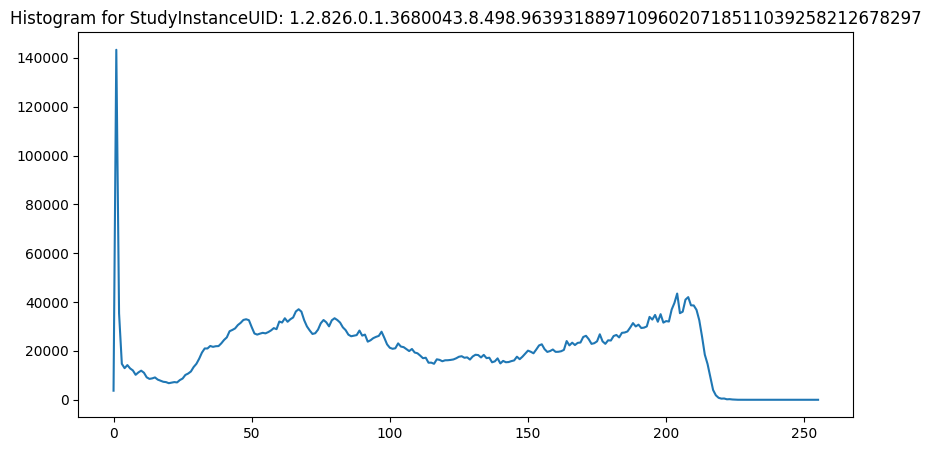

StudyInstanceUID: 1.2.826.0.1.3680043.8.498.94466503405349475789911466262028753478
Mean Intensity: 113.57925546875
Standard Deviation of Intensity: 49.266944410420095


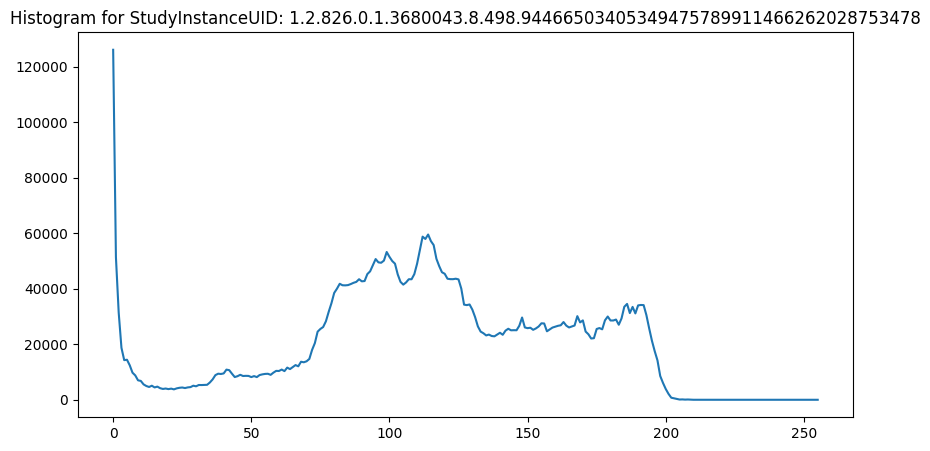

StudyInstanceUID: 1.2.826.0.1.3680043.8.498.98576735323157343195585673187692576298
Mean Intensity: 113.44101484375
Standard Deviation of Intensity: 59.59832286179573


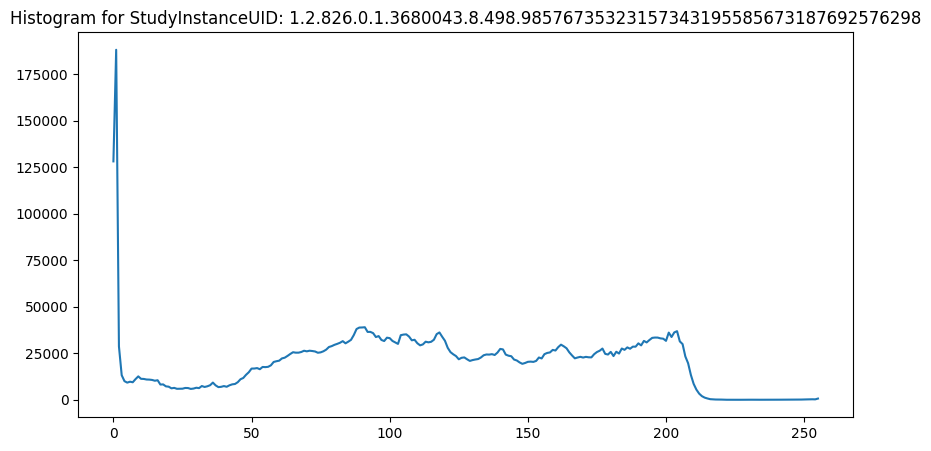

In [59]:
# Plot the randomly selected 5 studies
for study_uid in random_studies:
    # Construct the image path
    image_path = f"{image_dir}{study_uid}.jpg"

    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image for StudyInstanceUID {study_uid} not found.")
        continue

    # Extract grayscale features
    mean_intensity, std_intensity, histogram = extract_grayscale_features(image)

    # Print or store the features as needed
    print(f"StudyInstanceUID: {study_uid}")
    print(f"Mean Intensity: {mean_intensity}")
    print(f"Standard Deviation of Intensity: {std_intensity}")
    # You can also plot the histogram if needed
    plt.figure(figsize=(10, 5))
    plt.title(f"Histogram for StudyInstanceUID: {study_uid}")
    plt.plot(histogram)
    plt.show()


## Shape features

In [60]:
def extract_shape_features(image):
    # Convert to grayscale and apply thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate shape features
    shape_features = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        shape_features.append((area, perimeter))

    return shape_features


In [ ]:
import skimage.feature as skif

def extract_texture_features(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate GLCM and Haralick features
    glcm = skif.greycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = skif.greycoprops(glcm, 'contrast')[0, 0]
    correlation = skif.greycoprops(glcm, 'correlation')[0, 0]
    energy = skif.greycoprops(glcm, 'energy')[0, 0]
    homogeneity = skif.greycoprops(glcm, 'homogeneity')[0, 0]

    # Calculate Local Binary Pattern (LBP)
    lbp = skif.local_binary_pattern(gray, P=8, R=1, method="uniform")
    lbp_hist = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))[0]

    return contrast, correlation, energy, homogeneity, lbp_hist


In [ ]:
# Assuming you have a pre-trained model for keypoint detection
def detect_keypoints(model, image):
    # Preprocess the image as required by the model
    input_image = preprocess_for_model(image)

    # Detect keypoints
    keypoints = model.predict(input_image)

    # Postprocess the keypoints (e.g., rescaling coordinates)
    keypoints = postprocess_keypoints(keypoints)

    return keypoints


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.resnet50 import preprocess_input

def extract_deep_features(image):
    # Load pre-trained ResNet model
    base_model = ResNet50(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

    # Preprocess image
    img = keras_image.img_to_array(image)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Extract deep features
    deep_features = model.predict(img)
    return deep_features.flatten()


In [ ]:
def combine_features(grayscale_features, shape_features, texture_features, deep_features):
    # Flatten and concatenate all feature vectors
    combined_features = np.concatenate([
        [grayscale_features[0], grayscale_features[1]],  # mean and std intensity
        grayscale_features[2],  # histogram
        np.array(shape_features).flatten(),
        [texture_features[0], texture_features[1], texture_features[2], texture_features[3]],  # GLCM features
        texture_features[4],  # LBP histogram
        deep_features
    ])
    return combined_features


In [ ]:
image = cv2.imread("path_to_xray_image.jpg")

# Extract conventional features
grayscale_features = extract_grayscale_features(image)
shape_features = extract_shape_features(image)
texture_features = extract_texture_features(image)

# Extract deep learning features
deep_features = extract_deep_features(image)
keypoints = detect_keypoints(pretrained_model, image)  # If applicable

# Combine all features
combined_features = combine_features(grayscale_features, shape_features, texture_features, deep_features)

# Use combined_features for further modeling, e.g., classification, clustering, etc.
